# Regression Analysis To Predict The Price Of A Property


## Abstract :

A key challenge for property sellers is to determine the sale price of the property. The 
ability to predict the exact property value is beneficial for property investors as well as 
for buyers to plan their finances according to the price trend. The property prices 
depend on the number of features like the property area, basement square footage, year 
built, number of bedrooms, and so on.

## Data fields

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

MSSubClass: The building class

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access

Alley: Type of alley access

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to main road or railroad

Condition2: Proximity to main road or railroad (if a second is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality

ExterCond: Present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Height of the basement

BsmtCond: General condition of the basement

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)

BsmtFinSF2: Type 2 finished square feet 

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool 

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold

SaleType: Type of sale

SaleCondition: Condition of sale

# Contents :
1. Step 1: Importing libraries and Understanding the data
2. Step 2: Exploratory Data Analysis
3. Step 3: Splitting the data into training and testing set
4. Step 4: Building Machine Learning Models
5. Step 5: Tabulating the performance metrics of all models

## Step 1 : Importing Libraries and Understanding Data

In [1030]:
# Numpy, pandas, seaborn and matplotlib.pyplot are imported with aliases np, pd, sns and plt respectively
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, module="__main__")
warnings.filterwarnings("ignore", category=PendingDeprecationWarning, module="__main__")

In [1031]:
# Setting options to display all rows and columns
pd.options.display.max_columns=None
pd.options.display.max_rows=None
pd.options.display.width=None

In [1032]:
# Importing HousePrices data
import os 
os.chdir('E:/Imarticus/LMS/Python/9 EDA/EDA')
os.getcwd()
df = pd.read_csv('HousePrices.csv')

In [1033]:
# Looking at the first five rows
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1034]:
# Looking at the last five rows
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [1035]:
# Looking at data types of features
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [1036]:
# Let us remove the Id column as this will not be necessary for our analysis
df.drop('Id', axis=1, inplace=True)

In [1037]:
# Notice from the data definition that variables like MSSubClass, OverallQual and OverallCond are all categorical variables 
# but the way data is managed, they all appear integer after importing the dataset. 
# So here we convert the variables to categorical datatype
df['MSSubClass'] = df['MSSubClass'].astype('object')
df['OverallQual'] = df['OverallQual'].astype('object')
df['OverallCond'] = df['OverallCond'].astype('object')

In [1038]:
# Checking dimension
df.shape

(1460, 80)

## Step 2 : Exploratory Data Analysis
#### Analyzing, Visualizing & Treating Missing Values

In [1039]:
# Check which variables has missing values 
df.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [1040]:
# Seeing missing value in percentage
df.isnull().sum()*100/df.shape[0]

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
T

In [1041]:
columns_with_missing_values = df.columns[df.isnull().any()]

df[columns_with_missing_values].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

#### Visualize the missing values in absolute and  percentage term

Text(0.5, 1.0, 'Variables with missing values')

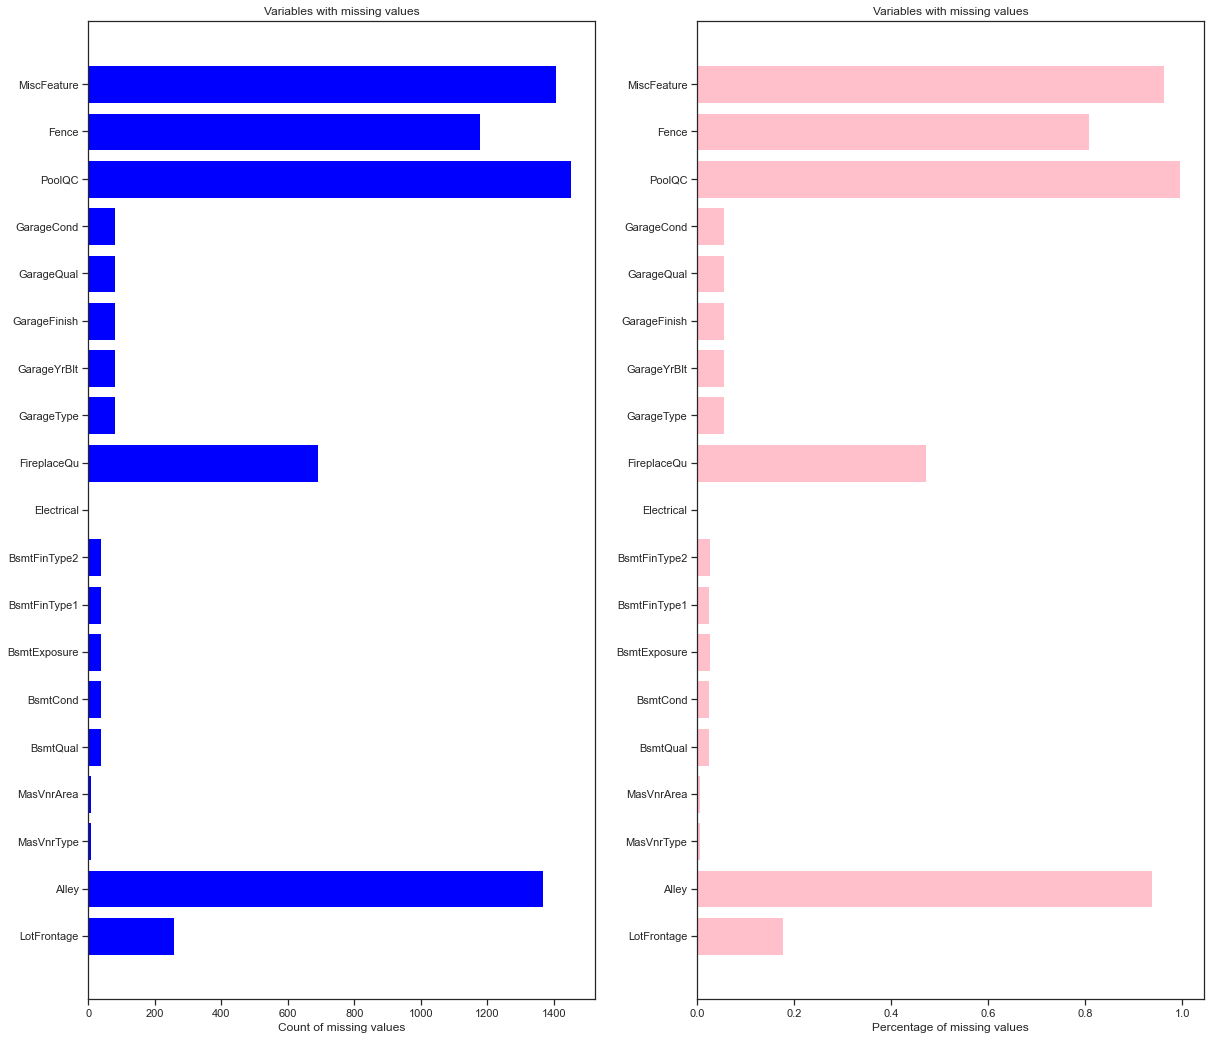

In [1042]:
import matplotlib.pyplot as plt
%matplotlib inline

# To hold variable names
labels = []

# To hold the count of missing values for each variable
valuecount = []

# To hold the percentage of missing values for each variable
percentcount = []

for col in columns_with_missing_values:
    labels.append(col)
    valuecount.append(df[col].isnull().sum())
    percentcount.append(df[col].isnull().sum()/df.shape[0])
    
ind = np.arange(len(labels))

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,18))

rects = ax1.barh(ind, np.array(valuecount), color='blue')
ax1.set_yticks(ind)
ax1.set_yticklabels(labels, rotation='horizontal')
ax1.set_xlabel('Count of missing values')
ax1.set_title('Variables with missing values');

rects = ax2.barh(ind, np.array(percentcount), color='pink')
ax2.set_yticks(ind)
ax2.set_yticklabels(labels, rotation='horizontal')
ax2.set_xlabel('Percentage of missing values')
ax2.set_title('Variables with missing values')

#### Observations :
1. We notice that variables like Alley, PoolQC, Fence, Miscfeature have 80% to 90% missing values.
2. A close look at the variable description for Alley, we see that the variable has 3 levels - Gravel, Paved and No Access. In    the original dataset, 'No Access' is codified as 'NA' and when it is read in Python, 'NA' is treated as NaN, meaning missing    value. This is absolutely wrong. 
3. So we replace the missing values for Alley with 'NoAccess'.

In [1043]:
# Replacing missing value in Alley with 'NoAccess'
df['Alley'].fillna('NoAccess', inplace=True)

<AxesSubplot:>

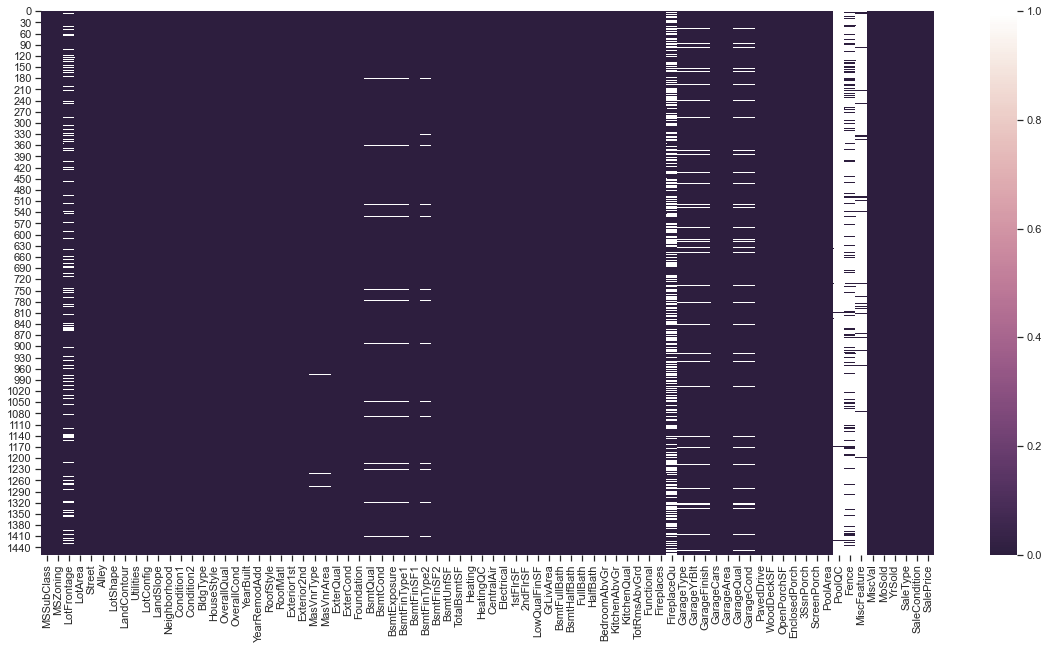

In [1044]:
# We can also visualize missing values using charts
import seaborn as sns

plt.figure(figsize=(20,10))

cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(df.isnull(), cmap=cmap)

In [1045]:
# We notice from the data description that LotFrontage is a continuous variable and has around 17.739% missing values. 
# We decide to replace the missing values with median.
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)

<AxesSubplot:>

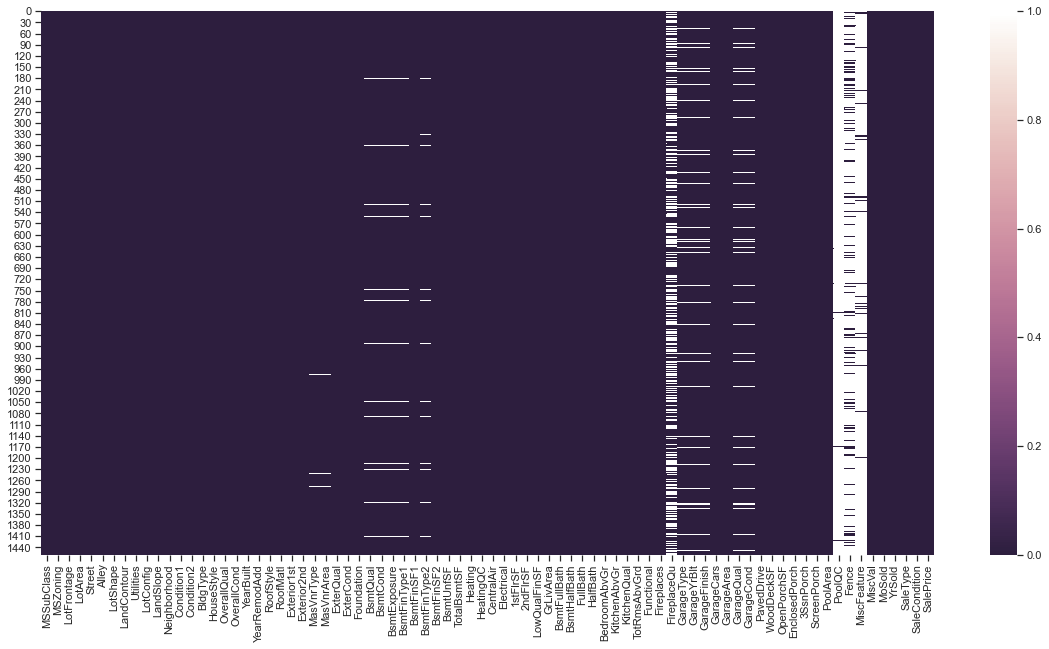

In [1046]:
plt.figure(figsize=(20,10))

cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(df.isnull(), cmap=cmap)

#### Observations :

1. We notice that in the following variables, NA has some meaning as follows:
2. PoolQC: NA stands for No Pool 
3. Fence: NA stands for No Fence
4. MiscFeature: NA stands for No Misc Features
5. Also for all Basement related variables, NA means No Basement.
6. Similarly, for all garage related variables, NA stands for No garage
7. For FireplaceQu, we see NA means No Fireplace

In [1047]:
# Replacing all NA values with their original meaning
df['BsmtQual'].fillna('No Basement', inplace=True)
df['BsmtCond'].fillna('No Basement', inplace=True)
df['BsmtExposure'].fillna('No Basement', inplace=True)
df['BsmtFinType1'].fillna('No Basement', inplace=True)
df['BsmtFinType2'].fillna('No Basement', inplace=True)

df['GarageYrBlt'].fillna(0, inplace=True)

# For observations where GarageType is null, we replace null values in GarageYrBlt = 0
df['GarageType'].fillna('No Garage', inplace=True)
df['GarageFinish'].fillna('No Garage', inplace=True)
df['GarageQual'].fillna('No Garage', inplace=True)
df['GarageCond'].fillna('No Garage', inplace=True)

df['PoolQC'].fillna('No Pool', inplace=True)
df['Fence'].fillna('No Fence', inplace=True)
df['MiscFeature'].fillna('None', inplace=True)

df['FireplaceQu'].fillna('No Fireplace', inplace=True)

In [1048]:
# Check for null values again
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       8
MasVnrArea       8
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

<AxesSubplot:>

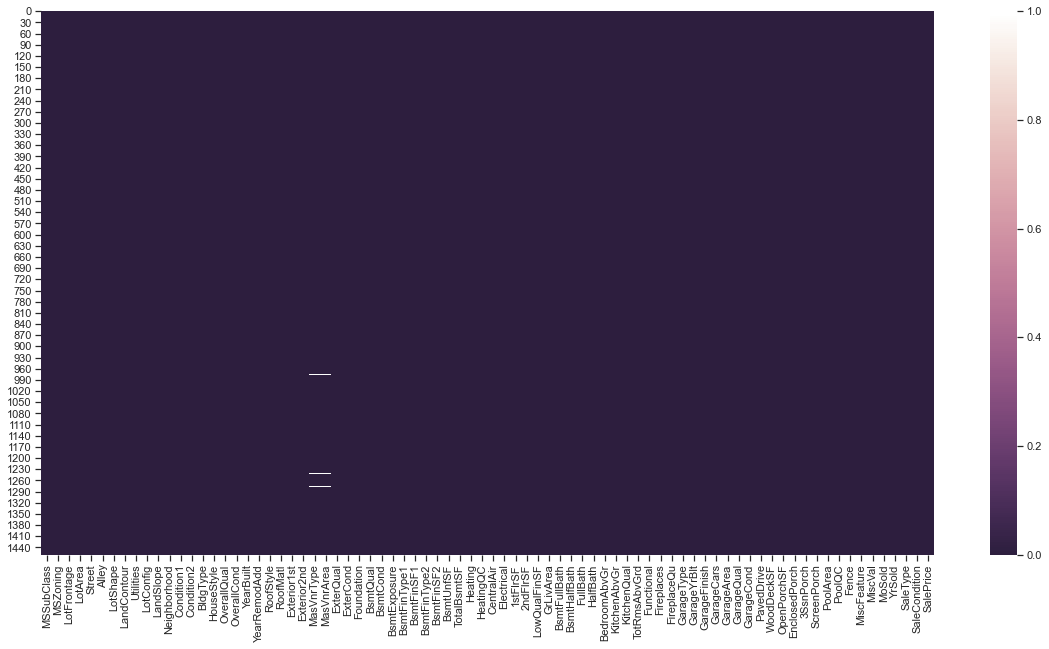

In [1049]:
# Visualize null values again
plt.figure(figsize=(20, 10))

cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(df.isnull(), cmap=cmap)

In [1050]:
# Using crosstab to generate the count of Mas Van Area by type of Mas Van Type
print(pd.crosstab(index=df['MasVnrType'],\
                 columns=df['MasVnrArea'], dropna=False, margins=True))

MasVnrArea  0.0  1.0  11.0  14.0  16.0  18.0  22.0  24.0  27.0  28.0  30.0  \
MasVnrType                                                                   
BrkCmn        0    0     0     0     0     0     0     0     0     0     0   
BrkFace       1    0     1     1     6     2     1     0     1     1     2   
None        859    2     0     0     0     0     0     0     0     0     0   
Stone         1    0     0     0     1     0     0     1     0     0     0   
All         861    2     1     1     7     2     1     1     1     1     2   

MasVnrArea  31.0  32.0  34.0  36.0  38.0  40.0  41.0  42.0  44.0  45.0  46.0  \
MasVnrType                                                                     
BrkCmn         0     0     0     0     0     0     1     0     0     0     0   
BrkFace        1     1     1     0     1     4     0     2     3     2     1   
None           0     0     0     0     0     0     0     0     0     0     0   
Stone          0     0     0     1     0     0     0 

#### Observations :
1. From the above crosstab, we see wherever we have MasVnrType=None, the MasVnrArea is equals to zero except 2 cases where MasVnrArea=1. 
2. Now we notice that wheen MasVnrType is missing, MasVnrArea is also missing.
3. So we replace the missing values in MasVnrType with None
4. And we replace the missing values in MasVnrArea with 0 (Zero)

In [1051]:
df['MasVnrType'].fillna('None', inplace=True)
df['MasVnrArea'].fillna(0, inplace=True)

In [1052]:
# We are still left with a missing value in Electrical
# Again using crosstab
print(pd.crosstab(index=df['Electrical'],\
                 columns=df['MSSubClass'], dropna=False, margins=True))

MSSubClass   20  30  40  45   50   60  70  75  80  85  90  120  160  180  190  \
Electrical                                                                      
FuseA        31  18   2   3   20    0   8   2   0   0   5    0    0    0    5   
FuseF         5   4   0   2    8    0   2   0   1   0   4    0    0    0    1   
FuseP         0   1   0   0    0    0   0   0   0   0   1    0    0    0    1   
Mix           0   1   0   0    0    0   0   0   0   0   0    0    0    0    0   
SBrkr       500  45   2   7  116  299  50  14  56  20  42   87   63   10   23   
All         536  69   4  12  144  299  60  16  58  20  52   87   63   10   30   

MSSubClass   All  
Electrical        
FuseA         94  
FuseF         27  
FuseP          3  
Mix            1  
SBrkr       1334  
All         1460  


In [1053]:
# Let us look at the observation where Electrical has a missing value
df['MSSubClass'][df['Electrical'].isnull()]

1379    80
Name: MSSubClass, dtype: object

#### Observation :
We notice that where Electrical type is missing, the MSSubClass is 80. We generate the above cross tab to see the distribution of Electrical types across MSSubClass. We notice that when MSSubClass is 80, th Electrical type is SBrkr. So we replace the missing value in Electrical with SBrkr.

In [1054]:
df['Electrical'].fillna('SBrkr', inplace=True)

<AxesSubplot:>

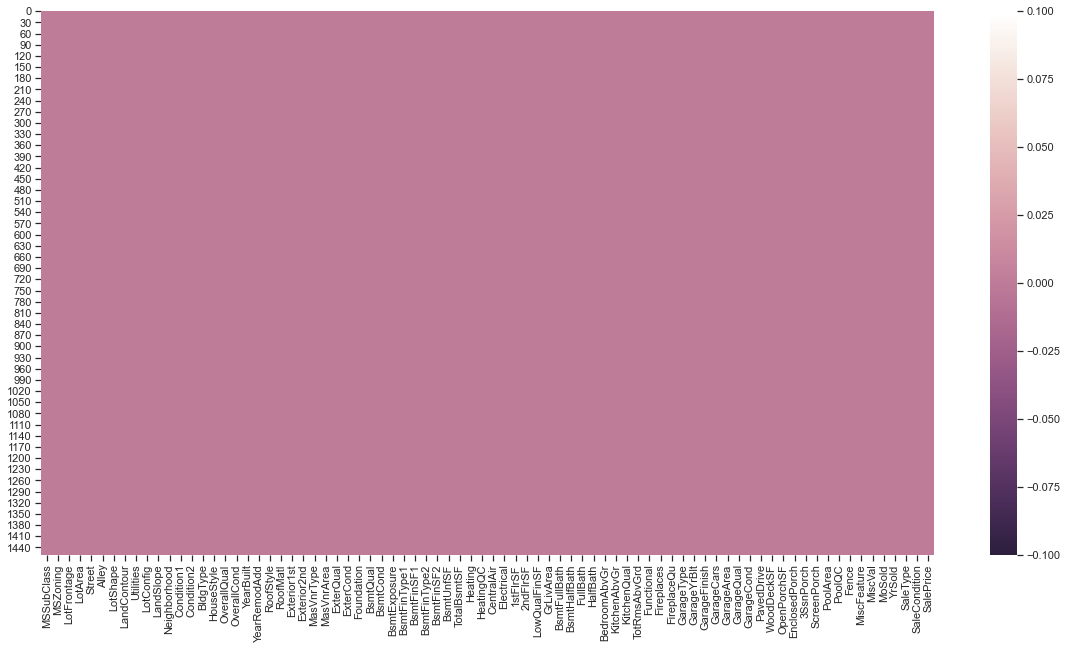

In [1055]:
# Let's visualize the missing value in heatmap once more
plt.figure(figsize=(20, 10))

cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(df.isnull(), cmap=cmap)

#### See summary statistics

In [1056]:
# Looking at the first five rows
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NoAccess,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NoAccess,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NoAccess,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NoAccess,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NoAccess,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000


In [1057]:
# Let's look at some statistical information about our dataframe
df.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.863699,10516.828082,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1868.739726,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,22.027677,9981.264932,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,453.697295,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,60.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,79.000000,11601.500000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [1058]:
# Looking at the data types of features
df.dtypes

MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual       object
OverallCond       object
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


#### Numerical and Categorical Features

In [1059]:
# Pulling out names of numerical variables by conditioning dtypes NOT equal to object type
numerical_features = df.dtypes[df.dtypes != 'object'].index
print('Number of Numerical Features:', len(numerical_features))
print(numerical_features)
# Pulling out names of categorical variables by conditioning dtypes equal to object type
categorical_features = df.dtypes[df.dtypes == 'object'].index
print('Number of Categorical Features:', len(categorical_features))
print(categorical_features)

Number of Numerical Features: 34
Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Number of Categorical Features: 46
Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'Bsmt

In [1060]:
type(numerical_features)

pandas.core.indexes.base.Index

In [1061]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

### See distribution for all numeric variables

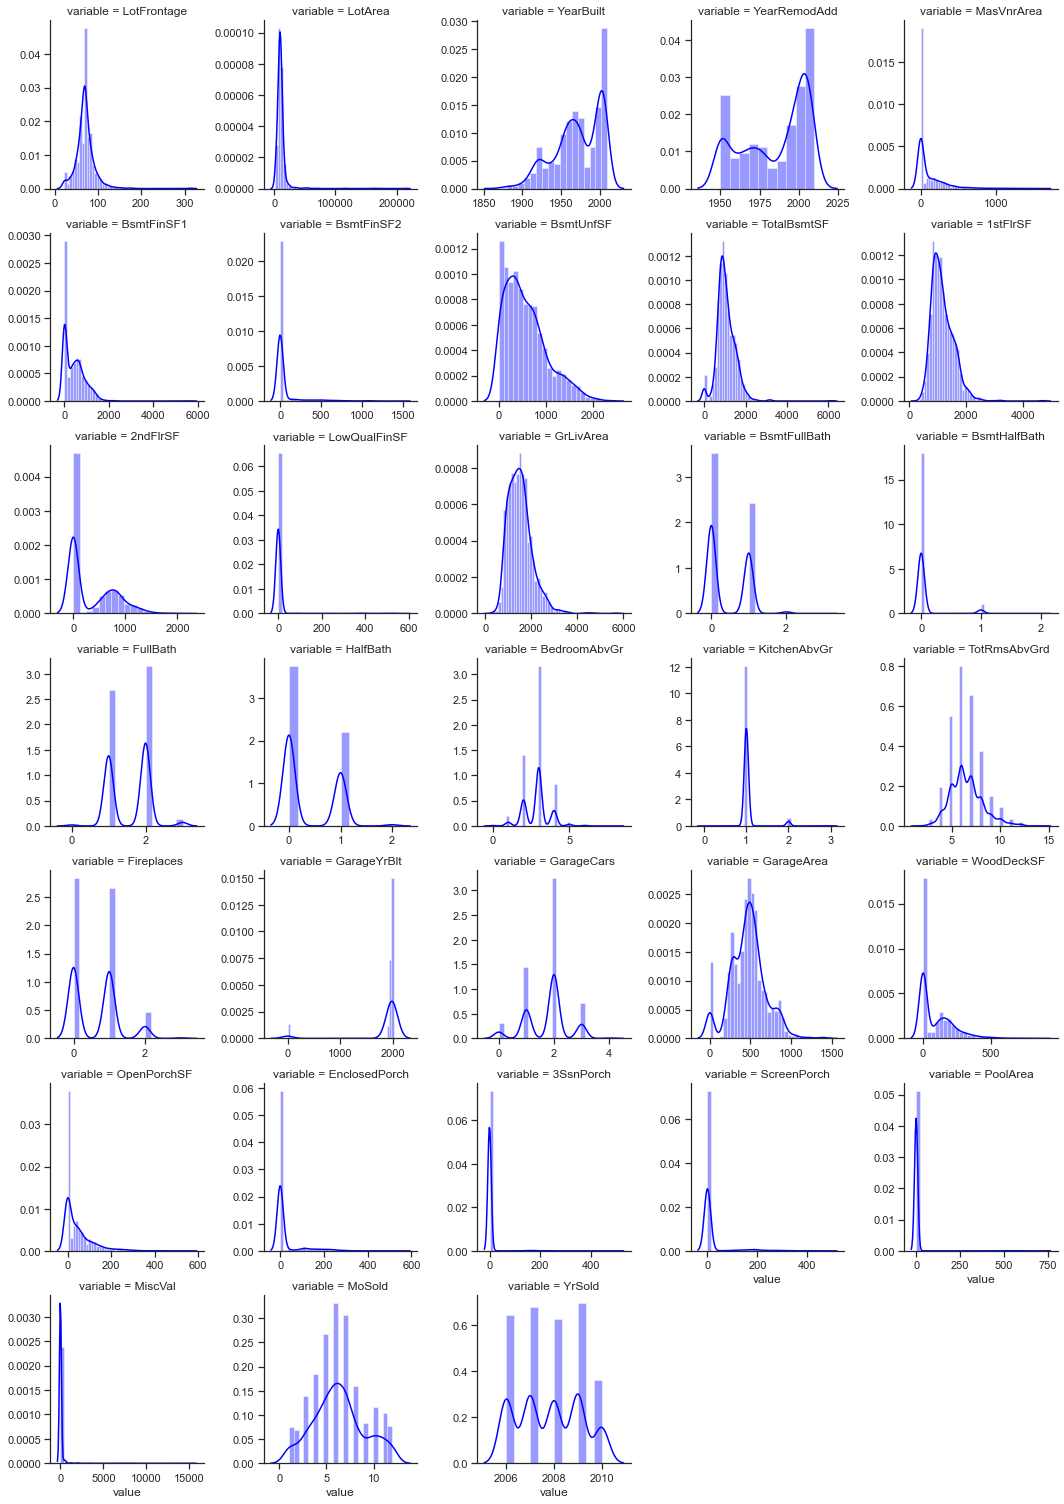

In [1062]:
f = pd.melt(df, id_vars=['SalePrice'],value_vars= numerical_features[numerical_features != "SalePrice"])
g = sns.FacetGrid(f, col='variable', col_wrap=5, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value', color='blue')

#### Observations:
1. When LotFrontage, LotArea uncreases the sale price also increases.
2. Newer the build property , higher the sale price is.
3. Same thing in case of remodellation, price increases if remodellation done recently.
4. Some features are skewed, which needs to be treated before building model.

### Check distribution of SalePrice with respect to Categorical variable values

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


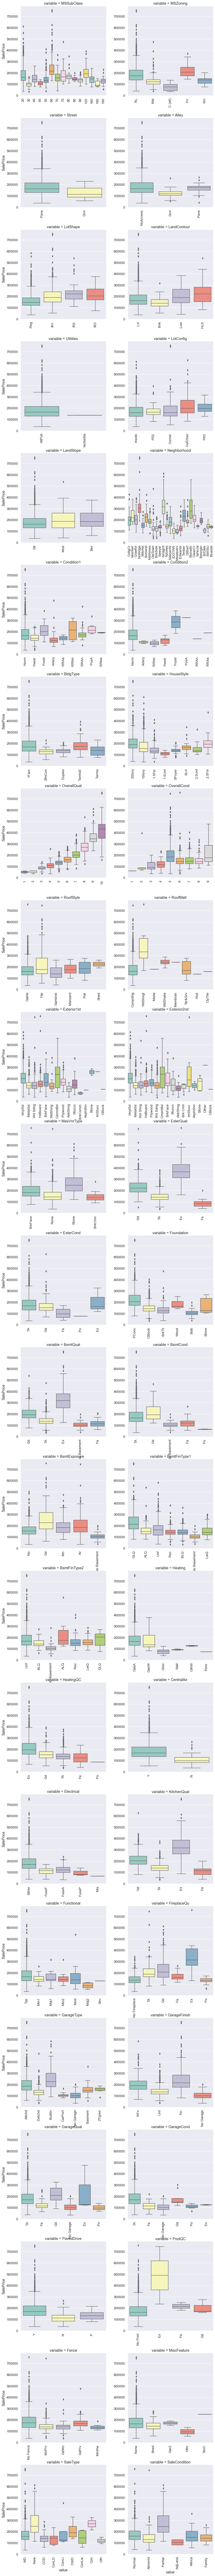

In [1063]:
sns.set(font_scale=1.2)

f =pd.melt(df, id_vars=['SalePrice'], value_vars=categorical_features)
facetobject = sns.FacetGrid(f, col='variable', col_wrap=2, sharex=False, sharey=False, size=6)
facetobject.map(sns.boxplot, 'value', 'SalePrice', palette='Set3')
facetobject.fig.subplots_adjust(wspace=0.25, hspace=0.25)

for ax in facetobject.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=90)

#### Observations:
1. MSZoning : Median sales price of Floating Village Residential is higher than any other zoned properties.
2. Street : If the street is paved , the sale price of property increases.
3. Alley : Access to the alley reduces the price of property.
4. LandContour : Properties which are on hillside are more costlier.
5. Utilities : It is obvious that properties with all utilities will have higher price.
6. Neighnourhood : Properties near to NorthRidge, NorthRidge Heights, Stone Brook and Timberland are more colstly.
7. Excellent pool quality, kitchen quality, overallquality rating and overall condition increases the price of property.

### Dealing with outliers present in the data.

In [1064]:
numeric_columns = df.select_dtypes(exclude='object')

In [1065]:
# Now use Z-score method to check and remove outliers
# commonly used method to detect univariate outliers is the internally standardized residuals, 
# aka the z-score method. For each observation (Xn), it is measured how many standard deviations 
# the data point is away from its mean (X̄). (99.7% of all data points are located 3 standard deviations around the mean)
from scipy import stats
z = np.abs(stats.zscore(numeric_columns))
print(z)
threshold = 3
print(np.where(z > 3))

[[0.22087509 0.20714171 1.05099379 ... 1.5991111  0.13877749 0.34727322]
 [0.46031974 0.09188637 0.15673371 ... 0.48911005 0.61443862 0.00728832]
 [0.08463612 0.07347998 0.9847523  ... 0.99089135 0.13877749 0.53615372]
 ...
 [0.1754621  0.14781027 1.00249232 ... 0.48911005 1.64520971 1.07761115]
 [0.08463612 0.08016039 0.70440562 ... 0.8591104  1.64520971 0.48852299]
 [0.23325479 0.05811155 0.20759447 ... 0.1191097  0.13877749 0.42084081]]
(array([   1,    3,    5,    7,    8,    9,   17,   24,   26,   28,   33,
         37,   37,   39,   39,   41,   46,   48,   48,   50,   51,   52,
         53,   53,   53,   53,   55,   58,   58,   64,   70,   70,   72,
         74,   78,   78,   80,   88,   88,   89,   93,   93,   99,  102,
        104,  105,  108,  113,  115,  116,  116,  118,  120,  125,  125,
        127,  129,  129,  137,  137,  140,  144,  144,  148,  153,  154,
        155,  159,  161,  163,  165,  165,  166,  166,  166,  169,  169,
        170,  171,  176,  176,  178,  178,  

In [1066]:
# remove the outliers and check the shape of data
df = df[(z < 3).all(axis=1)]
df.shape

(985, 80)

In [1067]:
# Generate a correlation matrix for all numeric variables
corr = df[numerical_features].corr()
print(corr)

               LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  \
LotFrontage       1.000000  0.568218   0.124610      0.068553    0.127118   
LotArea           0.568218  1.000000   0.029386     -0.011678    0.069726   
YearBuilt         0.124610  0.029386   1.000000      0.664334    0.298098   
YearRemodAdd      0.068553 -0.011678   0.664334      1.000000    0.169957   
MasVnrArea        0.127118  0.069726   0.298098      0.169957    1.000000   
BsmtFinSF1        0.146494  0.156180   0.176912      0.047659    0.216361   
BsmtFinSF2        0.008118  0.009413  -0.090498     -0.144186   -0.050919   
BsmtUnfSF         0.125080  0.065065   0.196153      0.234507    0.079283   
TotalBsmtSF       0.316177  0.256086   0.414821      0.303032    0.328726   
1stFlrSF          0.369370  0.341573   0.293175      0.252398    0.306487   
2ndFlrSF          0.017188  0.082832   0.108901      0.158413    0.079205   
LowQualFinSF     -0.112790 -0.071123   0.041384      0.025971   -0.040885   

In [1068]:
corr = df.corr()['SalePrice']
corr[np.argsort(corr)[::-1]]

MiscVal         -0.078544
GrLivArea        0.746213
Fireplaces       0.427170
GarageYrBlt      0.570809
SalePrice        1.000000
BsmtHalfBath          NaN
YearBuilt        0.619053
TotalBsmtSF      0.616465
BedroomAbvGr     0.257200
1stFlrSF         0.579915
TotRmsAbvGrd     0.586780
YearRemodAdd     0.567355
KitchenAbvGr          NaN
MasVnrArea       0.407393
GarageArea       0.647930
SalePrice        1.000000
LotFrontage      0.368338
BsmtFinSF1       0.338023
LotArea          0.333131
SalePrice        1.000000
GarageCars       0.684227
2ndFlrSF         0.302508
HalfBath         0.254290
FullBath         0.643888
BsmtFullBath     0.227916
BsmtUnfSF        0.213912
ScreenPorch      0.011065
EnclosedPorch   -0.197772
OpenPorchSF      0.389255
LowQualFinSF    -0.024923
PoolArea              NaN
3SsnPorch       -0.003140
BsmtFinSF2      -0.099607
WoodDeckSF       0.317152
Name: SalePrice, dtype: float64

<AxesSubplot:title={'center':'Correlation of Numeric Features with Sale Price'}>

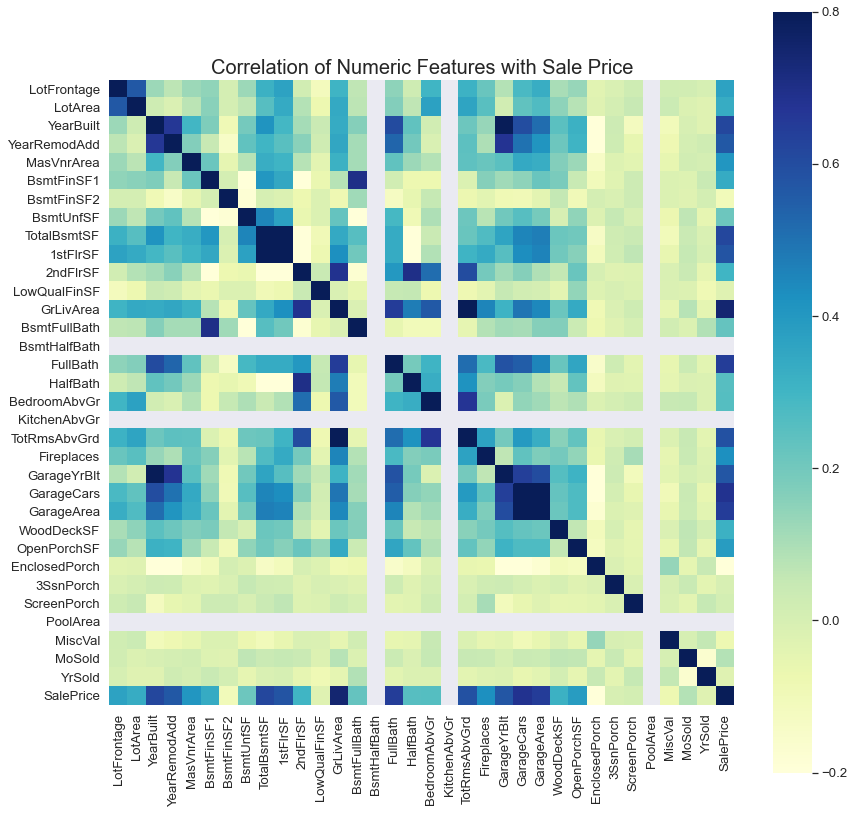

In [1069]:
# Get correlation of numeric variables
df_numerical_features = df.select_dtypes(include=[np.number])

correlation = df_numerical_features.corr()
correlation['SalePrice'].sort_values(ascending=False)*100
# Correlation Heatmap (seaborn library)
f, ax = plt.subplots(figsize=(14,14))
plt.title('Correlation of Numeric Features with Sale Price', y=1, size=20)

# cmap - matplotlib colormap name or object - can be used to set the color options
# vmin & vmax is used to anchor the colormap
sns.heatmap(correlation, square=True, vmin=-0.2, vmax=0.8, cmap='YlGnBu')

In [1070]:
type(df_numerical_features)

pandas.core.frame.DataFrame

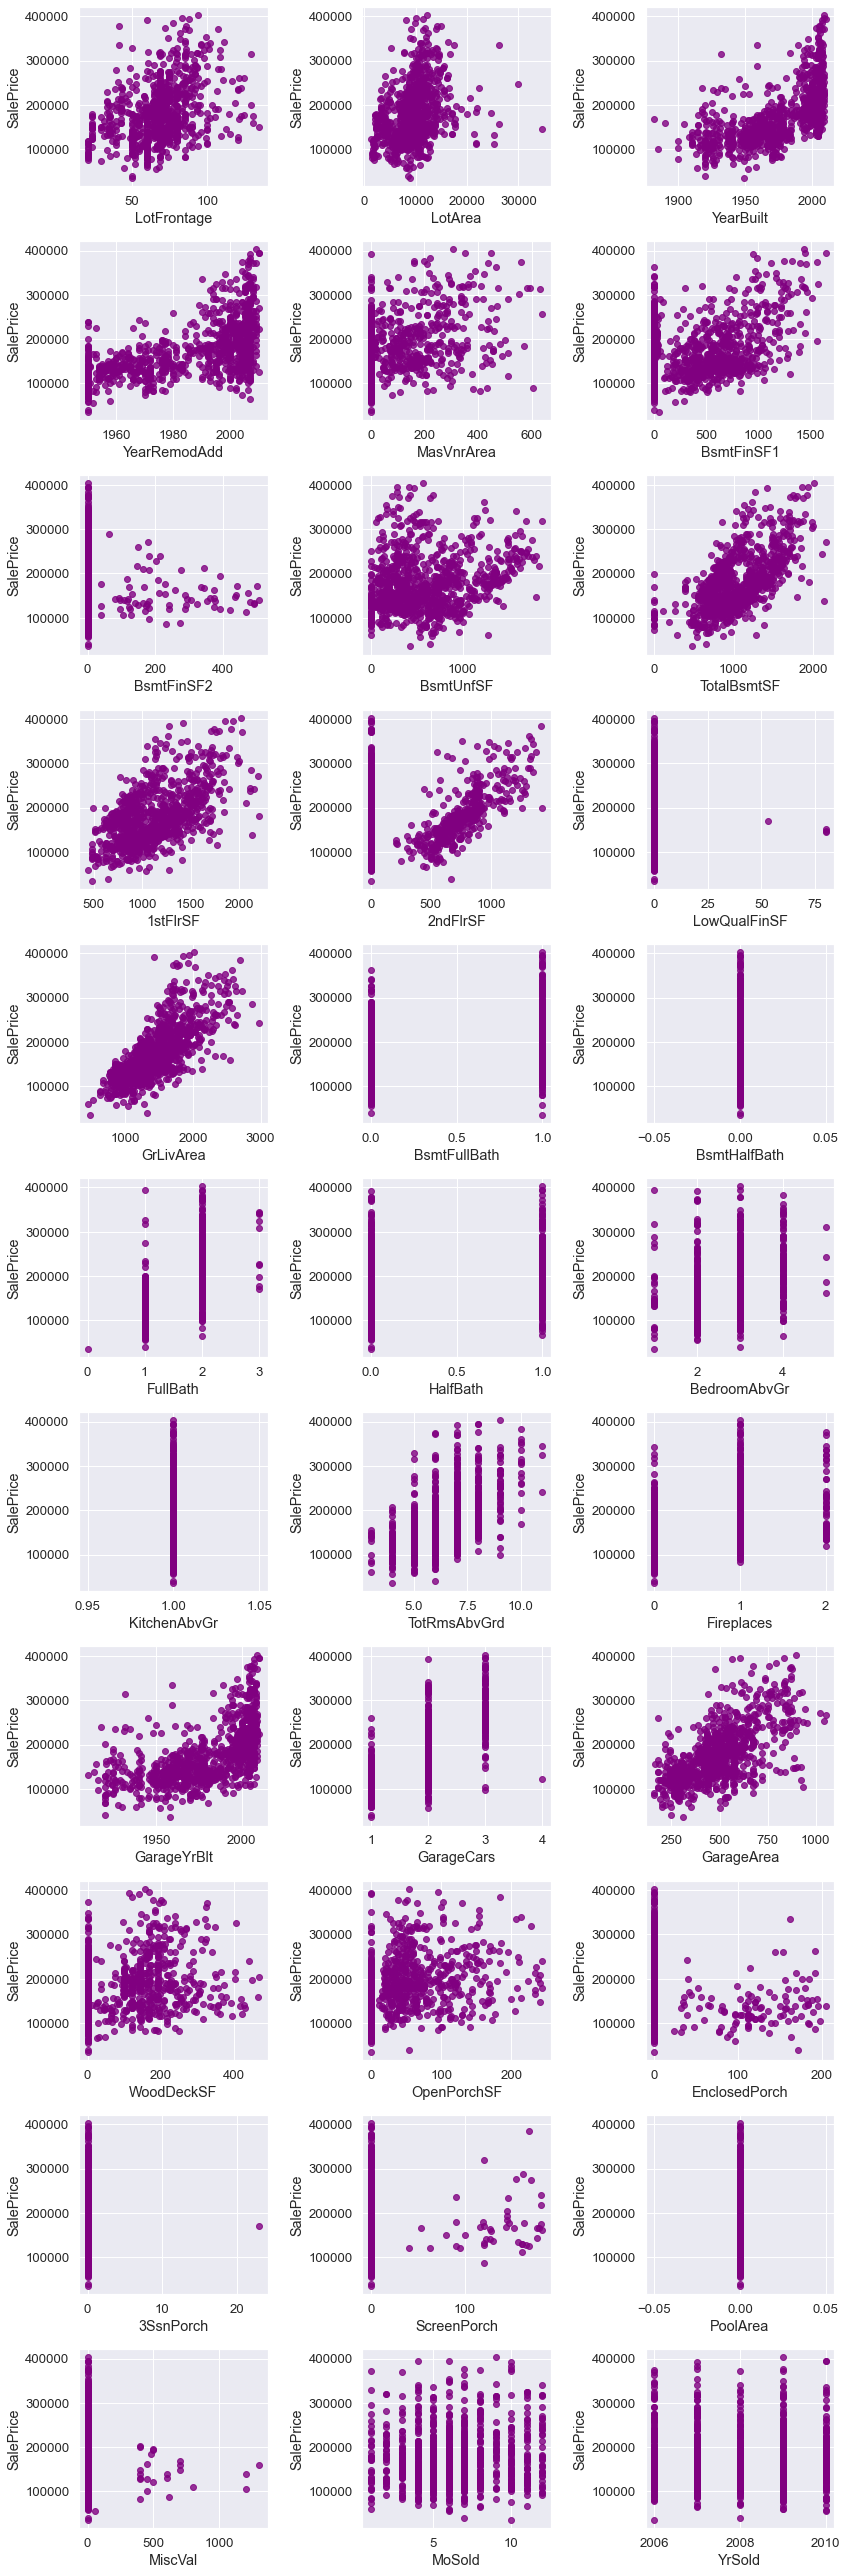

In [1071]:
import matplotlib.pyplot as plt
from scipy import stats

row_count = 11
col_count = 3

fig, axs = plt.subplots(row_count, col_count, figsize=(12,36))

exclude_columns = ['Id','SalePrice']
plot_numeric_features = [col for col in numerical_features if col not in exclude_columns]

for eachrow in range(0,row_count):
    for eachcol in range(0,col_count):
        i = eachrow*col_count + eachcol
        if i < len(plot_numeric_features):
            sns.regplot(df[plot_numeric_features[i]], df['SalePrice'], \
                       ax = axs[eachrow][eachcol], color='purple', fit_reg=False)
            
# tight_layout automatically adjusts subplots params so that the subplot(s) fits into the figure area
plt.tight_layout()
plt.show()

#### Observation :
Features like TotalBsmtSF, 1stFlrSF, 2nfFlrSF,GrLivArea have linear relationship with target variable.

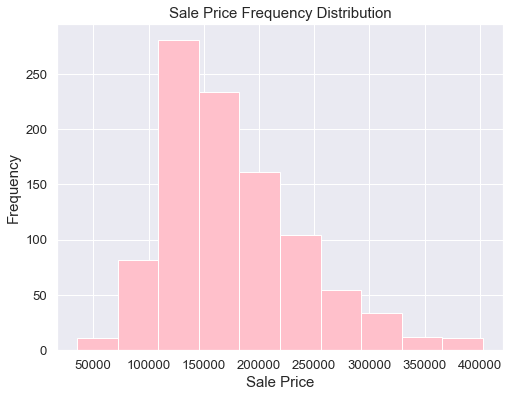

In [1072]:
# Sale Price Frequency Distribution
plt.figure(figsize=(8,6))
plt.hist(df['SalePrice'], color='pink')
plt.xlabel('Sale Price', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Sale Price Frequency Distribution', fontsize=15)
plt.show()

#### Observation :
Most of the properties in Ames have price between 100000-200000 dollars.  

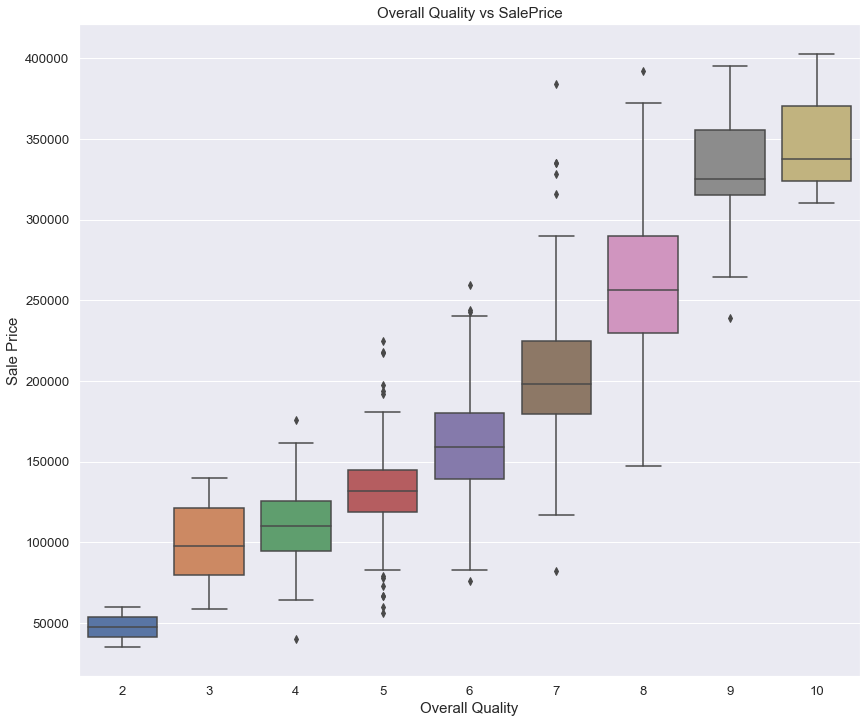

In [1073]:
# Boxplot of OverallQuality and SalePrice
plt.figure(figsize=(14,12))
sns.boxplot(y='SalePrice', x='OverallQual', data=df)
plt.title('Overall Quality vs SalePrice', fontsize=15)
plt.xlabel('Overall Quality', fontsize=15)
plt.ylabel('Sale Price', fontsize=15)
plt.show()

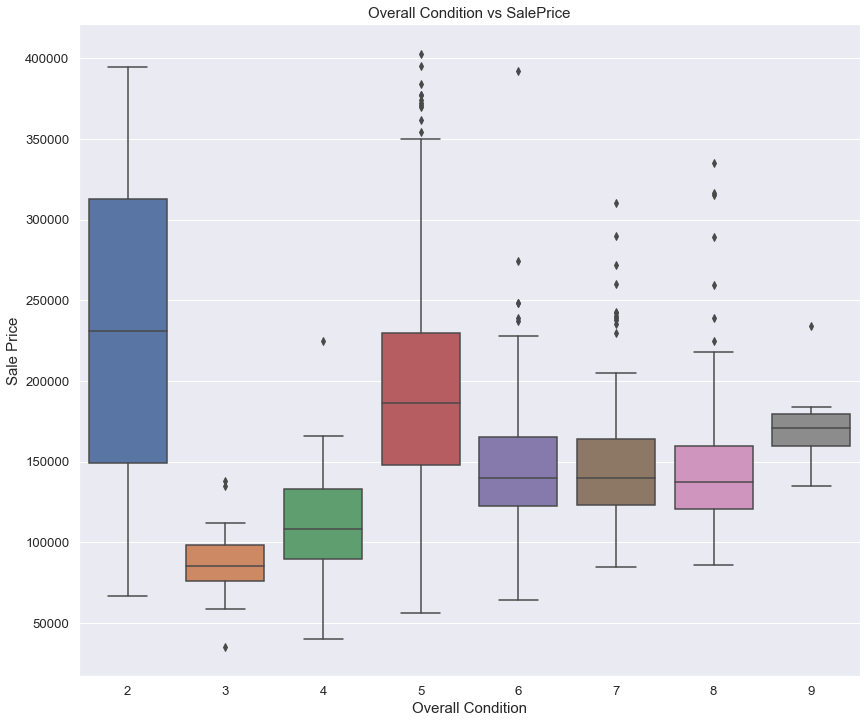

In [1074]:
# Boxplot of OverallCondition and SalePrice
plt.figure(figsize=(14,12))
sns.boxplot(y='SalePrice', x='OverallCond', data=df)
plt.title('Overall Condition vs SalePrice', fontsize=15)
plt.xlabel('Overall Condition', fontsize=15)
plt.ylabel('Sale Price', fontsize=15)
plt.show()

Index(['SalePrice', 'GrLivArea', 'GarageCars', 'GarageArea', 'FullBath',
       'YearBuilt', 'TotalBsmtSF', 'TotRmsAbvGrd', '1stFlrSF', 'GarageYrBlt',
       'YearRemodAdd'],
      dtype='object')


<AxesSubplot:>

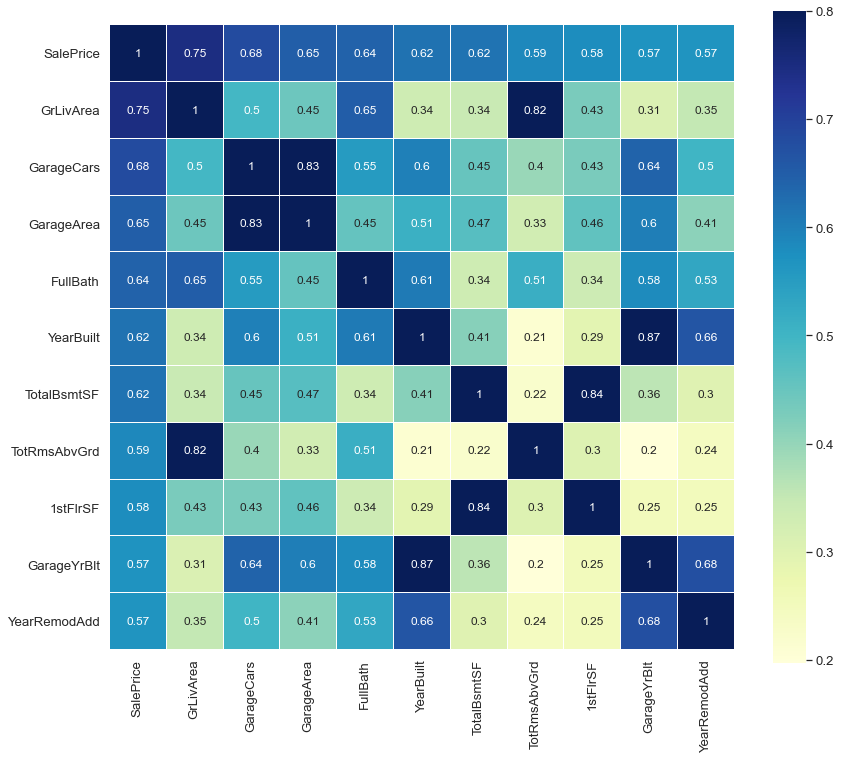

In [1075]:
# Zoomed Heat Map
k=11
cols =correlation.nlargest(k,'SalePrice')['SalePrice'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)
f, ax = plt.subplots(figsize=(14,12))
sns.heatmap(cm, vmax=0.8, linewidths=0.01,square=True,annot=True,cmap='YlGnBu',
           linecolor='white', xticklabels=cols.values, annot_kws = {'size':12}, yticklabels=cols.values)


#### Observation:
As we can see some independent variables are having high correlation with each, which indicates multicollinearity.

1. GrLivArea and TotrmsAbvGrd having correlation of  0.82.
2. GarageCars and GarageArea having correlation of 0.83.
3. 1stFlrSF and TotalBsmtSF having correlation of 0.84. 

So for better prediction we will have to deal with these variables.

In [1076]:
# Due to multicollinearity we decided to keep the variable which is having high correlation with target variable
# and dropping the other for better predictions. 
df = df.drop(['TotRmsAbvGrd','GarageArea','1stFlrSF','GarageYrBlt'], axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


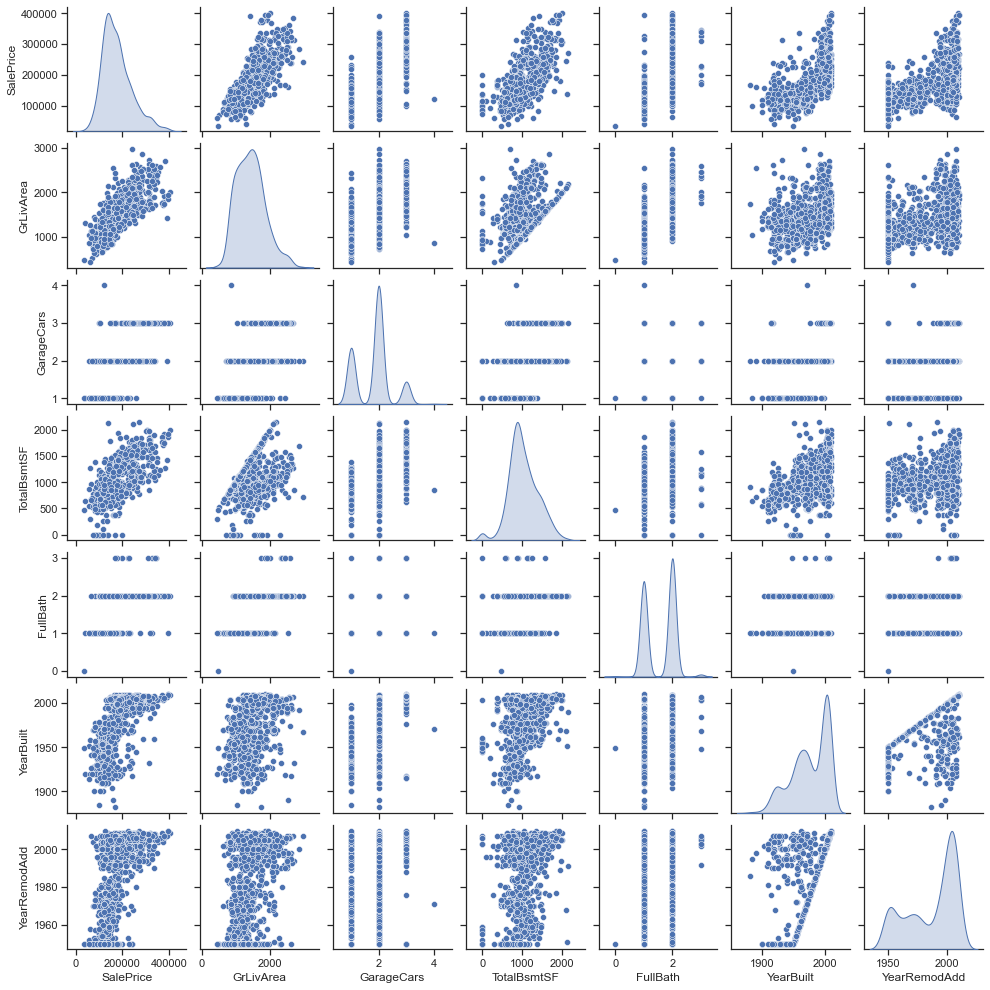

In [1077]:
# Pairplot of numeric variables 
sns.set(style='ticks', color_codes=True)
columns = ['SalePrice', 'GrLivArea', 'GarageCars', 'TotalBsmtSF','FullBath','YearBuilt', 'YearRemodAdd']
sns.pairplot(df[columns], size=2, kind='scatter', diag_kind='kde')
plt.show()

#### Observation :
1. The diagonal elements are showing the distribution of the feature.
2. Other elments have showing the relation with every feature using scatter plot.
3. Features like TotalBsmtSF, 1stFlrSF, 2nfFlrSF,GrLivArea have linear relationship with target variable.

#### Creating new meaningful variables

There are many variables which might not be very useful in their ownself. However, transforming them can throw a lot of insights to our analysis. A few variables like YearBuilt and YearRemodAdd represent original construction date and remodel date respectively. However if they can be converted into age, these variables can tell us how old the buildings are and how many years since it was remodelled. So we create 3 new variables: BuildingAge, RemodelAge and SoldAge to represent the age of the building ,the number of years since the building have been remodelled and sold.

In [1078]:
# Converting years to age
df['YearBuilt_Age'] = df['YearBuilt'].max() - df['YearBuilt']
df['YearRemodAdd_Age'] = df['YearRemodAdd'].max() - df['YearRemodAdd']
df['YrSold_Age'] = df['YrSold'].max() - df['YrSold']

# Dropping columns
df.drop(['YearBuilt','YearRemodAdd','YrSold'], axis=1, inplace = True)

In [1079]:
# have a look on data after transforming and dropping the variables
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age
0,60,RL,65.0,8450,Pave,NoAccess,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,No Fireplace,Attchd,RFn,2,TA,TA,Y,0,61,0,0,0,0,No Pool,No Fence,None,0,2,WD,Normal,208500,7,7,2
2,60,RL,68.0,11250,Pave,NoAccess,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,0,42,0,0,0,0,No Pool,No Fence,None,0,9,WD,Normal,223500,9,8,2
4,60,RL,84.0,14260,Pave,NoAccess,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,3,TA,TA,Y,192,84,0,0,0,0,No Pool,No Fence,None,0,12,WD,Normal,250000,10,10,2
6,20,RL,75.0,10084,Pave,NoAccess,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,0,0,1694,1,0,2,0,3,1,Gd,Typ,1,Gd,Attchd,RFn,2,TA,TA,Y,255,57,0,0,0,0,No Pool,No Fence,None,0,8,WD,Normal,307000,6,5,3
10,20,RL,70.0,11200,Pave,NoAccess,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,906,Unf,0,134,1040,GasA,Ex,Y,SBrkr,0,0,1040,1,0,1,0,3,1,TA,Typ,0,No Fireplace,Detchd,Unf,1,TA,TA,Y,0,0,0,0,0,0,No Pool,No Fence,None,0,2,WD,Normal,129500,45,45,2


#### Creating dummy variables

In [1080]:
# Separate Numeric and Categorical Variables 

# Numeric variables
num = df.select_dtypes(include=[np.number])
# Categorical variables
cat = df.select_dtypes(include='object')

In [1081]:
# The variables which are having category should be converted to dummy variables.
# The linear regression will only accept numbers so we will make dummy variables
dummy = pd.get_dummies(cat)

In [1082]:
# Combine Numerical and  Dummy variables
df_new = pd.concat([num,dummy], axis=1)

In [1083]:
# Have a look on combines data
df_new.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_NoAccess,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,Fireplace

In [1084]:
# Shape of new combined data
df_new.shape

(985, 298)

## Step 3 : Splitting the data in Training and Test Set

In [1085]:
# Putting feature varibale to x
X = df_new.drop('SalePrice', axis=1)

# Putting response variable to y
y = df_new['SalePrice']

Using sklearn we split 80% of our data into training set and reset in test set

Setting random_state will give the same tarining and test set everytime on running the code

In [1086]:
# split the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

In [1087]:
# Scaling the data using StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [1088]:
x_train = sc.fit_transform(X_train)
x_test = sc.fit_transform(X_test)

In [1089]:
X_train.shape

(788, 297)

# Step 4 : Build Machine Learning Models

### 1.Linear Regression

#### 1.1 Performing OLS Modelling

In [1090]:
import statsmodels.api as sm
# Fit the model to the training data and testing data
x_train_sm = sm.add_constant(x_train)
x_test_sm = sm.add_constant(x_test)
model = sm.OLS(y_train,x_train_sm)
results = model.fit()
# Making predictions using the model
linear_ypred = results.predict(x_test_sm)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     57.70
Date:                Thu, 30 Sep 2021   Prob (F-statistic):          3.05e-290
Time:                        00:55:05   Log-Likelihood:                -8555.3
No. Observations:                 788   AIC:                         1.757e+04
Df Residuals:                     559   BIC:                         1.864e+04
Df Model:                         228                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.754e+05    531.125    330.216      0.000    1.74e+05    1.76e+05
x1         -1688.9091    966.321     -1.748      0.081   -3586.972     209.154
x2          4160.5836   1070.666      3.886      0.000    2057.564    6263.604
x3           211.1949   1042.094      0.203      0.839   -1835.704    2258.094
x4          5494.9489    968.267      5.675      0.000    3593.063    7396.834
x5           962.0670   1340.016      0.718      0.473   -1670.014    3594.149
x6         -1090.5540    892.994     -1.221      0.223   -2844.588     663.480
x7          5176.5346   1571.679      3.294      0.001    2089.417    8263.652
x8          4501.1179   3471.826      1.296      0.195   -2318.301    1.13e+04
x9          -316.2348    606.739     -0.521      0.602   -1508.003     875.533
x10         2.398e+04   2610.794      9.187      0.000    1.89e+04    2.91e+04
x11         1049.1623    909.643      1.153      0.249    -737.574    2835.899
x12         3.887e-11   2.01e-11      1.933      0.054   -6.24e-13    7.84e-11
x13          991.3920   1333.391      0.744      0.457   -1627.676    3610.460
x14         -184.6663   1150.145     -0.161      0.872   -2443.801    2074.468
x15         -899.4485   1010.806     -0.890      0.374   -2884.890    1085.993
x16        -2.409e-11   2.29e-11     -1.054      0.292    -6.9e-11    2.08e-11
x17         2704.6307   1813.923      1.491      0.137    -858.308    6267.570
x18         4396.4089    991.146      4.436      0.000    2449.584    6343.234
x19         2447.0414    685.672      3.569      0.000    1100.234    3793.849
x20         1703.1655    761.564      2.236      0.026     207.289    3199.042
x21          753.7904    764.937      0.985      0.325    -748.711    2256.292
x22         -186.2963    590.643     -0.315      0.753   -1346.446     973.854
x23         2032.5660    665.686      3.053      0.002     725.014    3340.118
x24         5.579e-11   3.16e-11      1.768      0.078   -6.21e-12    1.18e-10
x25          323.7089   1632.352      0.198      0.843   -2882.584    3530.002
x26           44.3908    638.963      0.069      0.945   -1210.671    1299.452
x27        -9139.1456   3056.831     -2.990      0.003   -1.51e+04   -3134.867
x28        -1874.1022   1271.604     -1.474      0.141   -4371.809     623.604
x29          -69.5764    674.411     -0.103      0.918   -1394.266    1255.113
x30         7103.3534   4488.703      1.582      0.114   -1713.433    1.59e+04
x31         2391.4619   2185.162      1.094      0.274   -1900.671    6683.595
x32          783.1658    760.345      1.030      0.303    -710.316    2276.647
x33          166.1689   3189.159      0.052      0.958   -6098.030    6430.368
x34         3940.0601   6348.637      0.621      0.535   -8530.039    1.64e+04
x35        -1501.8619   4592.609     -0.327      0.744   -1.05e+04    7519.018
x3

#### 1.2 Model Performance Metrics

In [1091]:
linear_mse = mean_squared_error(y_test,linear_ypred)
linear_r2 = r2_score(y_test,linear_ypred)
from math import sqrt
linear_rmse = sqrt(linear_mse)
print('Mean_Squared_Error:',linear_mse)
print('Root_Mean_Squared_Error',linear_rmse)
print('r_squared_value:',linear_r2)

Mean_Squared_Error: 494303135.59239966
Root_Mean_Squared_Error 22232.929082610768
r_squared_value: 0.8801818407411541


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

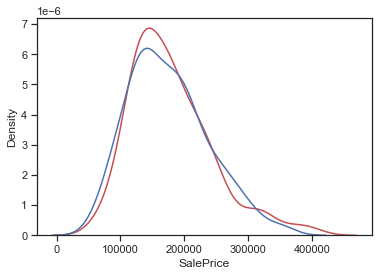

In [1092]:
# Plotting the Actual Vs Predicted distribution plot
ax1 = sns.distplot(y_test, hist=False, color='r', label='Actual Values')
sns.distplot(linear_ypred, hist=False, color='b', label='Predicted Values', ax=ax1)

### 2. Support Vector Machine 

#### 2.1 Hyperparameter tuning and model building

In [1093]:
# Tuning hyperparameters for SVM model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR

parameter_space = \
    {
        "kernel": ["poly", "linear", "rbf", "sigmoid"],
        "degree": [3, 5],
        "coef0": [0, 3, 7],
        "gamma":[1e-3, 1e-1, 1/x_train.shape[1]],
        "C": [1, 10, 100],
    }

clf = GridSearchCV(SVR(), parameter_space, cv=3, n_jobs=4,
                   scoring="neg_mean_absolute_error")

clf.fit(x_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'C': 10, 'coef0': 7, 'degree': 5, 'gamma': 0.003367003367003367, 'kernel': 'poly'}


In [1094]:
# Use best parameters to train the SVM model 
svr_model = SVR(**clf.best_params_)
# Fit the model to training data
svr_model.fit(x_train, y_train)
# Making predictions using the model
svm_ypred = svr_model.predict(x_test)


#### 2.2 Model Performance Metrics

In [1095]:
# Model performance metrics
svm_mse = mean_squared_error(y_test, svm_ypred)
svm_rmse = sqrt(svm_mse)
r_squared_svm = r2_score(y_test,svm_ypred)
print('Mean_Squared_Error:',svm_mse)
print('Root_Mean_Squared_Error',svm_rmse)
print('R2_for_svm:',r_squared_svm)

Mean_Squared_Error: 430156824.7606765
Root_Mean_Squared_Error 20740.222389373663
R2_for_svm: 0.8957307869923076


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

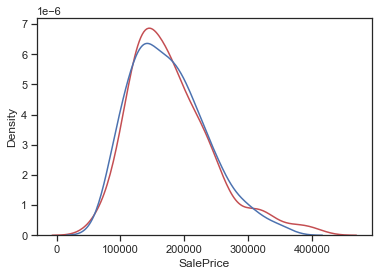

In [1096]:
# Plotting the Actual Vs Predicted distribution plot
ax1 = sns.distplot(y_test, hist=False, color='r', label='Actual Values')
sns.distplot(svm_ypred, hist=False, color='b', label='Predicted Values', ax=ax1)

### 3. Decision Tree Regressor

#### 3.1 Hyperparameter tuning and model building

In [1097]:
# Tuning hyperparameters for Decision Tree model
from sklearn.tree import DecisionTreeRegressor

parameter_space = \
    {
        "criterion": ["mse", "friedman_mse", "mae"],
        "min_samples_split": [5, 18, 29, 50],
        "min_samples_leaf": [3, 7, 15, 25],
        "max_features": [20, 50, 150, 200, X_train.shape[1]],
    }

clf = GridSearchCV(DecisionTreeRegressor(random_state=3), parameter_space, 
                   cv=3, scoring="neg_mean_absolute_error", n_jobs=4)

clf.fit(x_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'criterion': 'mae', 'max_features': 200, 'min_samples_leaf': 3, 'min_samples_split': 18}


In [1098]:
# Use best parameters to train the model
dt_model = DecisionTreeRegressor(**clf.best_params_)
# Fit the model to training data
dt_model.fit(x_train, y_train)
# Making predictions using the model
dt_ypred = dt_model.predict(x_test)

#### 3.2 Model Performance Metrics

In [1099]:
# Model performance metrics
dt_mse = mean_squared_error(y_test, dt_ypred)
dt_rmse = sqrt(dt_mse)
r_squared_dt = r2_score(y_test,dt_ypred)
print('Mean_Squared_Error:',dt_mse)
print('Root_Mean_Squared_Error',dt_rmse)
print('R2_for_dt:',r_squared_dt)

Mean_Squared_Error: 1406881609.529188
Root_Mean_Squared_Error 37508.420514988204
R2_for_dt: 0.6589745186485896


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

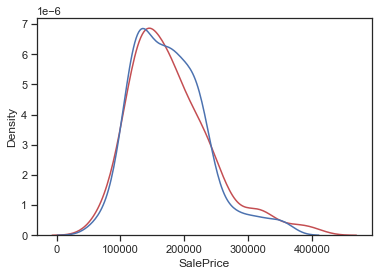

In [1100]:
# Plotting the Actual Vs Predicted distribution plot
ax1 = sns.distplot(y_test, hist=False, color='r', label='Actual Values')
sns.distplot(dt_ypred, hist=False, color='b', label='Predicted Values', ax=ax1)

### 4. Random Forest Regressor

#### 4.1 Hyperparameter tuning and model building

In [1101]:
# Tuning hyperparameters for RandomForestRegressor model
from sklearn.ensemble import RandomForestRegressor

parameter_space = \
    {
        "n_estimators": [10, 100, 300, 600],
        "criterion": ["mse", "mae"],
        "max_depth": [7, 50, 254],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 5],
        "max_features": [19, 100, X_train.shape[1]],
        "bootstrap": [True, False],
    }

clf = RandomizedSearchCV(RandomForestRegressor(random_state=3), 
                         parameter_space, cv=3, n_jobs=4,
                         scoring="neg_mean_absolute_error", 
                         n_iter=10, random_state=3)

clf.fit(x_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 100, 'max_depth': 50, 'criterion': 'mse', 'bootstrap': False}


In [1102]:
# Use best parameters to train the model
rf_model = RandomForestRegressor(**clf.best_params_)
# Fit the model to training data
rf_model.fit(x_train, y_train);
rf_ypred = rf_model.predict(x_test)

#### 4.2 Model Performance Metrics

In [1103]:
# Model performance metrics
rf_mse = mean_squared_error(y_test, rf_ypred)
rf_rmse = sqrt(rf_mse)
r_squared_rf = r2_score(y_test,rf_ypred)
print('Mean_Squared_Error:',rf_mse)
print('Root_Mean_Squared_Error',rf_rmse)
print('R2_for_rf:',r_squared_rf)

Mean_Squared_Error: 531287231.31975234
Root_Mean_Squared_Error 23049.668789805903
R2_for_rf: 0.871216964832379


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

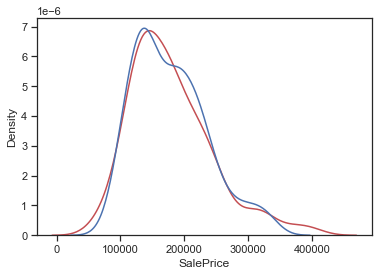

In [1104]:
# Plotting the Actual Vs Predicted distribution plot
ax1 = sns.distplot(y_test, hist=False, color='r', label='Actual Values')
sns.distplot(rf_ypred, hist=False, color='b', label='Predicted Values', ax=ax1)

In [1105]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestRegressor(n_estimators=300))
sel.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(n_estimators=300))

In [1106]:
# To see which features are important we can use get_support method on the fitted model.
sel.get_support()

array([ True,  True,  True,  True, False,  True,  True,  True, False,
        True, False, False,  True, False, False, False, False,  True,
        True,  True, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,

In [1107]:
import numpy as np

In [1108]:
# We can now make a list and count the selected features.
selected_feat= X.columns[(sel.get_support())]
len(selected_feat)

18

In [1109]:
# To get the name of the features selected
print(selected_feat)

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'GarageCars',
       'WoodDeckSF', 'OpenPorchSF', 'YearBuilt_Age', 'YearRemodAdd_Age',
       'OverallQual_8', 'ExterQual_TA', 'BsmtQual_Ex', 'BsmtQual_Gd'],
      dtype='object')


### 5. XG Boost Regressor

#### 5.1 Hyperparameter tuning and model building

In [1110]:
# Tuning hyperparameters for XGBRegressor model
from xgboost import XGBRegressor

parameter_space = \
    {
        "max_depth": [4, 5, 6],
        "learning_rate": [0.005, 0.009, 0.01],
        "n_estimators": [700, 1000, 2500],
        "booster": ["gbtree",],
        "gamma": [7, 25, 100],
        "subsample": [0.3, 0.6],
        "colsample_bytree": [0.5, 0.7],
        "colsample_bylevel": [0.5, 0.7,],
        "reg_alpha": [1, 10, 33],
        "reg_lambda": [1, 3, 10],
    }

clf = RandomizedSearchCV(XGBRegressor(random_state=3), 
                         parameter_space, cv=3, n_jobs=4,
                         scoring="neg_mean_absolute_error", 
                         random_state=3, n_iter=10)

clf.fit(x_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'subsample': 0.3, 'reg_lambda': 3, 'reg_alpha': 33, 'n_estimators': 2500, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 25, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.5, 'booster': 'gbtree'}


In [1111]:
# Use best parameters to train the model
xgb_model = XGBRegressor(**clf.best_params_)
# Fit the model to training data
xgb_model.fit(x_train, y_train)
xgb_ypred = xgb_model.predict(x_test)

#### 5.2 Model Performance Metrics

In [1112]:
# Model performance metrics
xgb_mse = mean_squared_error(y_test, xgb_ypred)
xgb_rmse = sqrt(xgb_mse)
r_squared_xgb = r2_score(y_test,xgb_ypred)
print('Mean_Squared_Error:',xgb_mse)
print('Root_Mean_Squared_Error',xgb_rmse)
print('R2_for XGB:',r_squared_xgb)

Mean_Squared_Error: 392959285.78572077
Root_Mean_Squared_Error 19823.200694784904
R2_for XGB: 0.9047474011466907


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

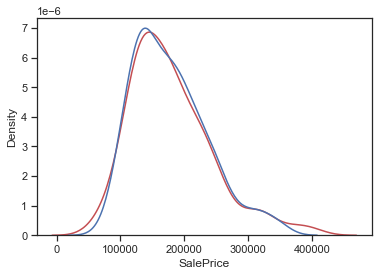

In [1113]:
# Plotting the Actual Vs Predicted distribution plot
ax1 = sns.distplot(y_test, hist=False, color='r', label='Actual Values')
sns.distplot(xgb_ypred, hist=False, color='b', label='Predicted Values', ax=ax1)

# Step 5: Tabulate the performance metrics of all the above models

In [1114]:
model_ev = pd.DataFrame({'Model': ['Linear Regression','SVM',
                    'Decision Tree Regressor','Random Forest Regressor', 'XGB Regressor'], 'Accuracy': [linear_r2,
                    r_squared_svm,r_squared_dt,r_squared_rf, r_squared_xgb]})
model_ev

,Model,Accuracy
0,Linear Regression,0.880182
1,SVM,0.895731
2,Decision Tree Regressor,0.658975
3,Random Forest Regressor,0.871217
4,XGB Regressor,0.904747


#### As we can see that XGBRegressor  performs better in predicting the price of property.

# Conclusion :
1. We built several algorithms to predict price based on features.
2. We evaluated and compared each model to find one with highest performance.
3. We also looked at how model ranks the features according to their importance.
4. We followed data science practices like getting data cleaning, preprocessing data, exploring data, building models, evaluating results and communicating them with visualization.

In [1115]:
print('Selected_features we got from RandomForest Regressor:',selected_feat)

Selected_features we got from RandomForest Regressor: Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'GarageCars',
       'WoodDeckSF', 'OpenPorchSF', 'YearBuilt_Age', 'YearRemodAdd_Age',
       'OverallQual_8', 'ExterQual_TA', 'BsmtQual_Ex', 'BsmtQual_Gd'],
      dtype='object')


1. LotFrontage: Linear feet of street connected to property
2. LotArea: Lot size in square feet
3. OverallQual: Rates the overall material and finish of the house
4. YearBuilt_Age : how old the buildings are
5. YearRemodAdd_Age: how many years since it was remodelled
6. MasVnrArea: Masonry veneer area in square feet
7. ExterQual: Evaluates the quality of the material on the exterior 
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor 
8. BsmtQual: Evaluates the height of the basement
       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
9. BsmtFinSF1: Type 1 finished square feet
10. BsmtUnfSF: Unfinished square feet of basement area
11. TotalBsmtSF: Total square feet of basement area
12. 2ndFlrSF: Second floor square feet
13. GrLivArea: Above grade (ground) living area square feet
14. FullBath: Full bathrooms above grade
15. GarageCars: Size of garage in car capacity
16. WoodDeckSF: Wood deck area in square feet
17. OpenPorchSF: Open porch area in square feet
18. MoSold: Month Sold (MM)

This are the features we should consider while buying the property, so that investors and buyers can plan things accordingly.